# PENGUMPULAN DATA
disini kami menggunakan data yang kami dapatkan dari api cryptocompare. data
yang kami gunakan adalah data history harga coin crypto solana.

kami menggunakan library requests dan pandas.

Request digunakan untuk mengirimkan HTTP request. Library ini digunakan untuk berinteraksi dengan API dengan mengirim permintaan GET, POST, PUT, DELETE.

Pandas digunakan untuk memanipulasi dataframe

In [ ]:
import requests
import pandas as pd

In [ ]:
url = 'https://min-api.cryptocompare.com/data/v2/histoday' # alamat API cryptocompare
parameters = {
    'fsym': 'SOL', # coint solana
    'tsym': 'USD', # harga dalam usd
    'limit': 1400  # Jumlah data
}
response = requests.get(url, params=parameters) # melakukan request ke api dengan parameter yang telah di tetapkan
data = response.json()['Data']['Data'] # mengonversi isi http dan menyimpan sebagai objek python

# Mengonversi ke DataFrame Pandas
df = pd.DataFrame(data)
df['time'] = pd.to_datetime(df['time'], unit='s') # mengonversi bentuk epoch time (jumlah detik sejak 1 Januari 1970)
# ke bentuk format date time yang memiliki informasi tahun, bulan, hari
df # menampilkan data

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2020-07-13,1.311,1.0030,1.0180,1956555.00,2.291839e+06,1.1710,multiply,BTC
1,2020-07-14,1.273,1.1250,1.1710,915666.00,1.050111e+06,1.1470,multiply,BTC
2,2020-07-15,1.416,1.1310,1.1470,1400028.00,1.792898e+06,1.2810,multiply,BTC
3,2020-07-16,1.388,0.8220,1.2810,6040131.00,5.268344e+06,0.8722,multiply,BTC
4,2020-07-17,1.048,0.7722,0.8722,7079787.00,6.923644e+06,0.9779,multiply,BTC
...,...,...,...,...,...,...,...,...,...
1403,2024-05-16,164.720,156.7000,158.5700,1750109.58,2.810655e+08,159.3400,direct,
1404,2024-05-17,172.050,159.3400,159.3400,1555327.37,2.595322e+08,169.5000,direct,
1405,2024-05-18,175.960,168.7300,169.5000,920162.26,1.590018e+08,172.4700,direct,
1406,2024-05-19,175.370,166.2000,172.4700,762244.06,1.301389e+08,169.9400,direct,


In [ ]:
df.to_csv('datasolana.csv', index=False)

In [ ]:
df = pd.read_csv('datasolana.csv')

# EKSPLORASI DAN PREPROSES DATA

In [ ]:
# @title Melihat sekilas data paling atas

df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2020-07-13,1.311,1.0030,1.0180,1956555.0,2291838.98,1.1710,multiply,BTC
1,2020-07-14,1.273,1.1250,1.1710,915666.0,1050110.56,1.1470,multiply,BTC
2,2020-07-15,1.416,1.1310,1.1470,1400028.0,1792897.62,1.2810,multiply,BTC
3,2020-07-16,1.388,0.8220,1.2810,6040131.0,5268343.99,0.8722,multiply,BTC
4,2020-07-17,1.048,0.7722,0.8722,7079787.0,6923643.52,0.9779,multiply,BTC


In [ ]:
# @title melihat info tipe data pada dataframe
# disini terlihat fitur time, conversiontype, conversionsymbol bertipe data objek
# karena pada pembangunan model harus bertipe data numerik kami akan melakukan
# penghapusan atau konversi ke numerik

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1400 non-null   object 
 1   high              1400 non-null   float64
 2   low               1400 non-null   float64
 3   open              1400 non-null   float64
 4   volumefrom        1400 non-null   float64
 5   volumeto          1400 non-null   float64
 6   close             1400 non-null   float64
 7   conversionType    1400 non-null   object 
 8   conversionSymbol  111 non-null    object 
dtypes: float64(6), object(3)
memory usage: 98.6+ KB


In [ ]:
# @title melihat data yang kosong
# pada hasilnya tidak ada data yang kosong jadi tidak perlu melakukan penghapusan data
df.isnull().sum()

time                   0
high                   0
low                    0
open                   0
volumefrom             0
volumeto               0
close                  0
conversionType         0
conversionSymbol    1289
dtype: int64

In [ ]:
# @title melihat apakah ada data yang sama atau dumplikat

duplikat = df[df.duplicated()]
duplikat

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol


In [ ]:
# @title menghapus kolom conversiontype, conversionsymbol karena tidak dibutuhkan untuk prediksi
# karena menampilkan data yang tidak relevan

df.drop(['conversionType', 'conversionSymbol'], axis=1, inplace=True)
df.head()

,time,high,low,open,volumefrom,volumeto,close
0,2020-07-13,1.311,1.0030,1.0180,1956555.0,2291838.98,1.1710
1,2020-07-14,1.273,1.1250,1.1710,915666.0,1050110.56,1.1470
2,2020-07-15,1.416,1.1310,1.1470,1400028.0,1792897.62,1.2810
3,2020-07-16,1.388,0.8220,1.2810,6040131.0,5268343.99,0.8722
4,2020-07-17,1.048,0.7722,0.8722,7079787.0,6923643.52,0.9779


In [ ]:
# @title melakukan konversi data time dari objek ke datetime

df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        1400 non-null   datetime64[ns]
 1   high        1400 non-null   float64       
 2   low         1400 non-null   float64       
 3   open        1400 non-null   float64       
 4   volumefrom  1400 non-null   float64       
 5   volumeto    1400 non-null   float64       
 6   close       1400 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 76.7 KB


In [ ]:
# @title disini kami akan membuat fitur baru yang berisi informasi tahun, bulan, hari
# yang akan kami ekstrak dari kolom time

df['year'] = df['time'].dt.year.astype(int)
df['month'] = df['time'].dt.month.astype(int)
df['day'] = df['time'].dt.day.astype(int)

df.head()

,time,high,low,open,volumefrom,volumeto,close,year,month,day
0,2020-07-13,1.311,1.0030,1.0180,1956555.0,2291838.98,1.1710,2020,7,13
1,2020-07-14,1.273,1.1250,1.1710,915666.0,1050110.56,1.1470,2020,7,14
2,2020-07-15,1.416,1.1310,1.1470,1400028.0,1792897.62,1.2810,2020,7,15
3,2020-07-16,1.388,0.8220,1.2810,6040131.0,5268343.99,0.8722,2020,7,16
4,2020-07-17,1.048,0.7722,0.8722,7079787.0,6923643.52,0.9779,2020,7,17


In [ ]:
# @title disini kami menghapus kolom time karena datanya sudah diekstrak ke kolom year, month, day

df.drop(['time'], axis=1, inplace=True)
df.head()

,high,low,open,volumefrom,volumeto,close,year,month,day
0,1.311,1.0030,1.0180,1956555.0,2291838.98,1.1710,2020,7,13
1,1.273,1.1250,1.1710,915666.0,1050110.56,1.1470,2020,7,14
2,1.416,1.1310,1.1470,1400028.0,1792897.62,1.2810,2020,7,15
3,1.388,0.8220,1.2810,6040131.0,5268343.99,0.8722,2020,7,16
4,1.048,0.7722,0.8722,7079787.0,6923643.52,0.9779,2020,7,17


In [ ]:
df.describe()

,high,low,open,volumefrom,volumeto,close,year,month,day
count,1400.000000,1400.000000,1400.000000,1.400000e+03,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000
mean,59.108275,53.764021,56.435805,2.704087e+06,1.770552e+08,56.537546,2021.944286,6.550714,15.728571
std,60.882287,55.595434,58.368886,2.562828e+06,2.396943e+08,58.396368,1.179299,3.518602,8.802936
min,0.920100,0.772200,0.872200,2.130939e+04,5.580379e+04,0.872200,2020.000000,1.000000,1.000000
25%,19.095000,17.297500,18.232500,1.092701e+06,2.186193e+07,18.240000,2021.000000,3.000000,8.000000
50%,33.045000,30.435000,31.685000,2.060617e+06,8.764304e+07,31.725000,2022.000000,7.000000,16.000000
75%,95.950000,87.577500,92.275000,3.553090e+06,2.410363e+08,92.495000,2023.000000,10.000000,23.000000
max,259.950000,245.900000,258.630000,3.246075e+07,2.460799e+09,258.630000,2024.000000,12.000000,31.000000


In [ ]:
# @title Disini kami menyimpan dataframe yang sudah melewati prapemrosesan data ke csv agar tidak melakukan run ulang dari awal ketika membuka collab
df.to_csv('data_solana_clean.csv', index=False)

In [ ]:
df

,high,low,open,volumefrom,volumeto,close,year,month,day
0,1.311,1.0030,1.0180,1956555.00,2.291839e+06,1.1710,2020,7,13
1,1.273,1.1250,1.1710,915666.00,1.050111e+06,1.1470,2020,7,14
2,1.416,1.1310,1.1470,1400028.00,1.792898e+06,1.2810,2020,7,15
3,1.388,0.8220,1.2810,6040131.00,5.268344e+06,0.8722,2020,7,16
4,1.048,0.7722,0.8722,7079787.00,6.923644e+06,0.9779,2020,7,17
...,...,...,...,...,...,...,...,...,...
1395,149.890,139.9800,148.0300,1370735.76,1.995139e+08,142.1500,2024,5,8
1396,153.290,140.5900,142.1500,1297903.53,1.901108e+08,152.5700,2024,5,9
1397,155.680,144.6000,152.5700,1716642.31,2.563047e+08,146.0300,2024,5,10
1398,147.610,143.1100,146.0300,857719.99,1.246064e+08,145.3700,2024,5,11


In [ ]:
# @title menggunakan data dari csv yang telah dibuat
df = pd.read_csv('data_solana_clean.csv')
df.head()

,high,low,open,volumefrom,volumeto,close,year,month,day
0,1.311,1.0030,1.0180,1956555.0,2291838.98,1.1710,2020,7,13
1,1.273,1.1250,1.1710,915666.0,1050110.56,1.1470,2020,7,14
2,1.416,1.1310,1.1470,1400028.0,1792897.62,1.2810,2020,7,15
3,1.388,0.8220,1.2810,6040131.0,5268343.99,0.8722,2020,7,16
4,1.048,0.7722,0.8722,7079787.0,6923643.52,0.9779,2020,7,17


In [ ]:
# @title melihat informasi data untuk mengecek lagi apakah data sudah siap
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   high        1400 non-null   float64
 1   low         1400 non-null   float64
 2   open        1400 non-null   float64
 3   volumefrom  1400 non-null   float64
 4   volumeto    1400 non-null   float64
 5   close       1400 non-null   float64
 6   year        1400 non-null   int64  
 7   month       1400 non-null   int64  
 8   day         1400 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 98.6 KB


# VISUALISASI DATA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

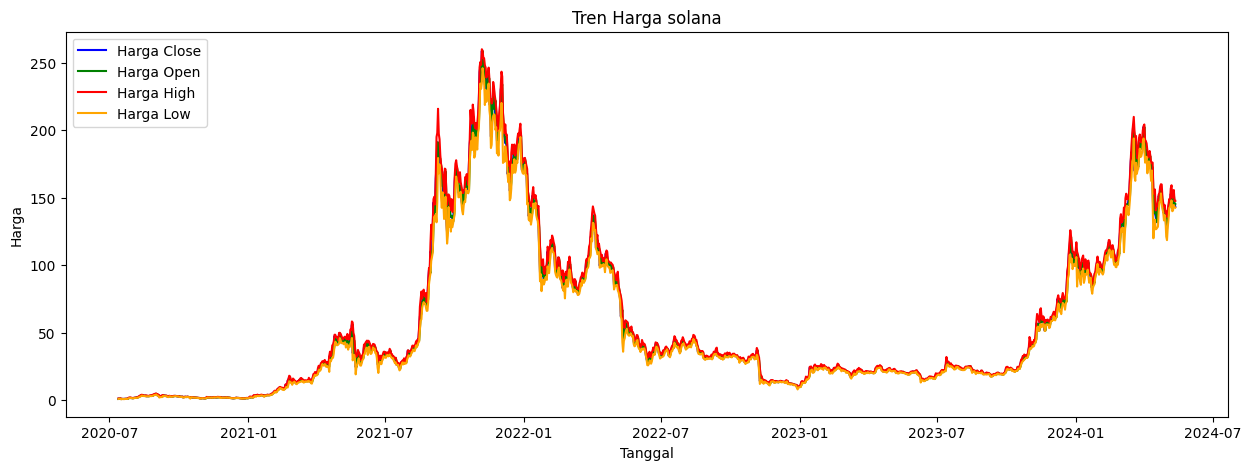

In [ ]:
# @title harga solana dari waktu ke waktu

# menggabungkan kolom year, month, day menjadi date, untuk digunakan sebagai label dan sortir
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Mengurutkan data berdasarkan date
df = df.sort_values(by='date')

# disini kami berfokus pada data close karena lebih stabil dan banyak digunakan sebagai stategi perdagangan
# membuat plot harga close
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['close'], label='Harga Close', color='blue') # membuat plot dari kolom close, memberi label harga close dan menerapkan warna biru
plt.plot(df['date'], df['open'], label='Harga Open', color='green') # membuat plot dari kolom open, memberi label harga open dan menerapkan warna hijau
plt.plot(df['date'], df['high'], label='Harga High', color='red') # membuat plot dari kolom high, memberi label harga high dan menerapkan warna merah
plt.plot(df['date'], df['low'], label='Harga Low', color='orange') # membuat plot dari kolom low, memberi label harga low dan menerapkan warna orange
plt.title('Tren Harga solana') # mengatur title
plt.xlabel('Tanggal') # label x
plt.ylabel('Harga') # label y
plt.legend() # menampilkan legenda
plt.show() # menampilkan plot

# menghapus kolom date karena tidak digunakan lagi
df.drop(['date'], axis=1, inplace=True)

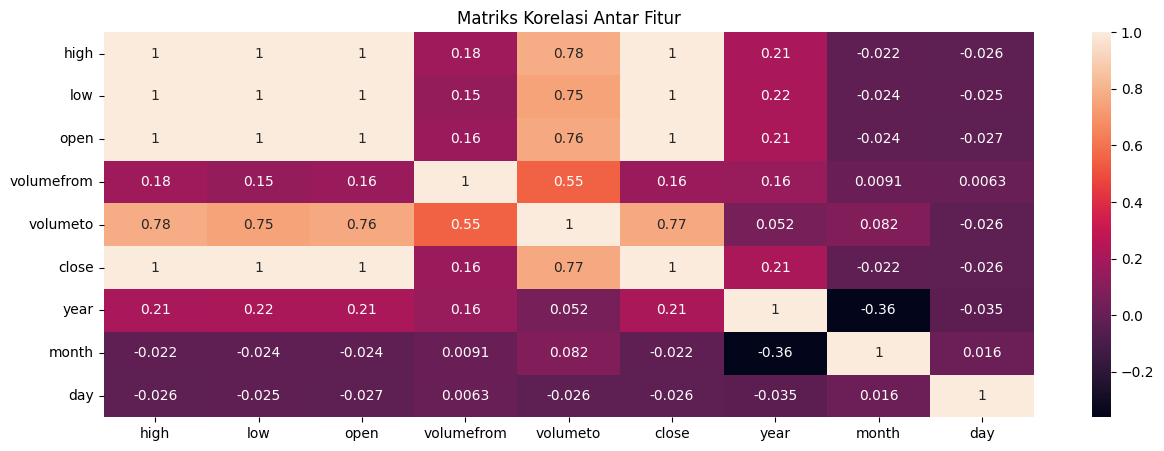

In [ ]:
# Menghitung matriks korelasi menggunakan pandas
corr_matrix = df.corr()

# membuat plot heatmap korelasi
plt.figure(figsize=(15, 5)) # ukuran 15:5
sns.heatmap(corr_matrix, annot=True) # membuat visual heatmap dan menampilkan parameter
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

# bisa dilihat dari matriks, bahwa dalam mengidentifikasi fitur yang terdapat dalam
# harus mendekati nilai 1 atau -1 yang dimana hal tersebut memiliki hubungan yang kuat
# selanjutnya untuk nilai korelasi yang mendekati 0 maka tidak ada hubungan linear yang signifikan antar kedua fitur tersebut


# terlihat bahwa high, low, open, clone memiliki relasi yang kuat ini tandanya data tersebut adalah duplikat
# kami disini hanya akan berfokus memprediksi harga close

# MEMBANGUN MODEL

In [ ]:
# @title Import model

from sklearn.ensemble import RandomForestRegressor # model random forest regresor yang akan digunakan untuk memprediksi
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data test dan data latih
from sklearn.metrics import mean_squared_error, mean_absolute_error
# mean square eror dan mean absolute eror untuk mengevaluasi matrik kesalahan

In [ ]:
# @title memisahkan fitur dan target
# disini kami menggunakan semua fitur kecuali close karena close akan kami jadikan
# sebagai target prediksi
X = df[['volumefrom', 'volumeto', 'year', 'month', 'day']]
y = df['close']


## melihat jumlah baris pada fitur dan target, untuk memastikan jumlahnya sama

In [ ]:
X.shape

(1400, 5)

In [ ]:
y.shape

(1400,)

## Melatih Data

In [ ]:

# Bagi data menjadi data latih dan data uji dengan rasio data test 30% dan data latih 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Inisialisasi dan pelatihan model
# 1000 n_estimator untuk meningkatkan akurasi
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

# Pengujian Model

In [ ]:
# Evaluasi model
y_pred = rf_regressor.predict(X_test)

actual_predic=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
actual_predic

,Actual,Predicted
1110,24.810,23.49190
310,34.960,46.97730
776,30.430,32.59120
491,219.090,219.37270
1063,15.550,15.39470
...,...,...
165,1.448,1.39016
858,13.250,12.91140
651,100.990,95.12990
82,2.550,2.19989


In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.0864642357142875
Mean Squared Error: 62.61341141971737
Root Mean Squared Error: 7.91286366745424


In [ ]:
# @title Mencari Absolute Error

# menghitung absolut eror
errors = abs(y_pred - y_test)
# menampilkan rata rata absolute eror
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# menghitung mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.09 degrees.
Accuracy: 90.22 %.


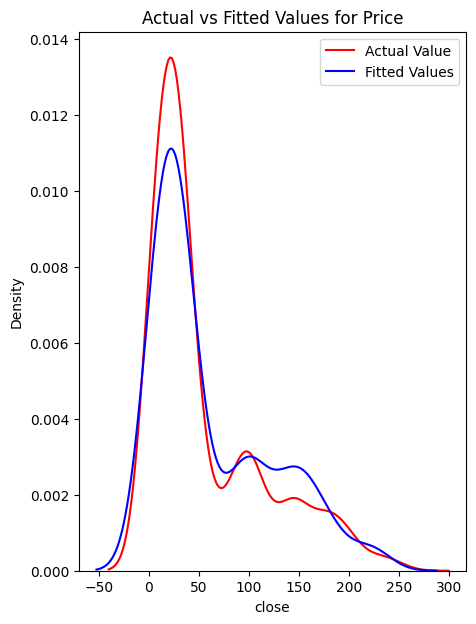

In [ ]:
plt.figure(figsize=(5, 7))

# Plot nilai aktual menggunakan kdeplot
ax = sns.kdeplot(y, color="r", label="Actual Value")
# Plot nilai prediksi menggunakan kdeplot pada axis yang sama
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax)

plt.title('Actual vs Fitted Values for Price')
plt.legend()  # Untuk menampilkan legend
plt.show()